### Entrega Final 
###### Grupo 3
* Narumi Miyamoto 
* Rodrigo Cervera
* Alicia Chaquila

### Pregunta 1 - Regresiones lineales (Python y R)

Replicación de tablas del paper Gender Differences in the Choice of Major: The Importance of Female Role Models de Chaterine Porter y Danila Serra.


In [2]:
#Importamos librerías

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import re 
import os # f
#plots library

import matplotlib.pyplot as plt
import seaborn as sns

# import linear models library

# statmodels: libreria para econometría 

import statsmodels.api as sm  # se especifica el modelo: y (vector), X (dataframe)
import statsmodels.formula.api as smf # se especifica el modelo como formula" y ~ x1 + x2 + x3"

# Export latex table 
!pip install pystout
from pystout import pystout
import statsmodels.api as sm



In [3]:
# Set directorio

data = pd.read_stata(r'../../data/trabajo_final/replicacion/SerraPorterAEJ.dta')
data

,anonid,took_fall,took_year,tookanother,numeconclass,econmajor,Major,Major_STEM,Major_Business,Major_Finance,...,ecojobs_b,ecojobs_c,ecojobs_d,ecojobs_e,ecojobs_f,ecojobs_g,ecojobs_h,major_current_a,major_current_b,survey_econmajor
0,4.0,0.0,0.0,0.0,0.0,0.0,Mathematics - BS,1.0,0.0,0.0,...,Entrepreneur,Journalist/ Correspondent,Working for marketplace on NPR,Business consultant,,,,Mathematics,,0.0
1,5.0,0.0,0.0,0.0,0.0,0.0,Biological Sciences - BS,1.0,0.0,0.0,...,Tax advisor,Managerial Position,,,,,,Biology,,0.0
2,7.0,1.0,1.0,1.0,13.0,1.0,Economics w/ Fina Appl - BS,0.0,0.0,0.0,...,,,,,,,,,,NaN
3,9.0,0.0,0.0,0.0,0.0,0.0,Journalism - BA,0.0,0.0,0.0,...,,,,,,,,Journalism,Communications,0.0
4,10.0,0.0,0.0,1.0,1.0,0.0,Markets & Culture - BA,0.0,0.0,0.0,...,Investment Banker,,,,,,,Markets and Culture,Economics,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1386.0,0.0,0.0,0.0,0.0,0.0,Markets & Culture - BA,0.0,0.0,0.0,...,,,,,,,,,,NaN
623,1388.0,0.0,0.0,0.0,0.0,0.0,Economics w/ Fina Appl - PMJ,0.0,0.0,0.0,...,,,,,,,,Business,,0.0
624,1389.0,0.0,0.0,0.0,0.0,0.0,Accounting - BBA,0.0,1.0,0.0,...,Finance,Bank,Government,,,,,Economics,Public Relations,1.0
625,1393.0,0.0,1.0,1.0,10.0,1.0,Economics - BA,0.0,0.0,0.0,...,Professor,Economist,,,,,,Entrepreneurship,Finance Economics,0.0


In [5]:
# summmary statistics

data.describe()

# Tipo de variables

data.info()

data.dtypes
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 0 to 626
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anonid            627 non-null    float32
 1   took_fall         627 non-null    float32
 2   took_year         627 non-null    float32
 3   tookanother       627 non-null    float32
 4   numeconclass      627 non-null    float32
 5   econmajor         627 non-null    float32
 6   Major             627 non-null    object 
 7   Major_STEM        627 non-null    float32
 8   Major_Business    627 non-null    float32
 9   Major_Finance     627 non-null    float32
 10  Major_Marketing   627 non-null    float32
 11  Major_SocSc       627 non-null    float32
 12  Major_Arts        627 non-null    float32
 13  Major_Comm        627 non-null    float32
 14  Major_Hum         627 non-null    float32
 15  female            627 non-null    float32
 16  greek             501 non-null    float64
 1

,anonid,took_fall,took_year,tookanother,numeconclass,econmajor,Major,Major_STEM,Major_Business,Major_Finance,...,ecojobs_b,ecojobs_c,ecojobs_d,ecojobs_e,ecojobs_f,ecojobs_g,ecojobs_h,major_current_a,major_current_b,survey_econmajor
0,4.0,0.0,0.0,0.0,0.0,0.0,Mathematics - BS,1.0,0.0,0.0,...,Entrepreneur,Journalist/ Correspondent,Working for marketplace on NPR,Business consultant,,,,Mathematics,,0.0
1,5.0,0.0,0.0,0.0,0.0,0.0,Biological Sciences - BS,1.0,0.0,0.0,...,Tax advisor,Managerial Position,,,,,,Biology,,0.0
2,7.0,1.0,1.0,1.0,13.0,1.0,Economics w/ Fina Appl - BS,0.0,0.0,0.0,...,,,,,,,,,,NaN
3,9.0,0.0,0.0,0.0,0.0,0.0,Journalism - BA,0.0,0.0,0.0,...,,,,,,,,Journalism,Communications,0.0
4,10.0,0.0,0.0,1.0,1.0,0.0,Markets & Culture - BA,0.0,0.0,0.0,...,Investment Banker,,,,,,,Markets and Culture,Economics,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1386.0,0.0,0.0,0.0,0.0,0.0,Markets & Culture - BA,0.0,0.0,0.0,...,,,,,,,,,,NaN
623,1388.0,0.0,0.0,0.0,0.0,0.0,Economics w/ Fina Appl - PMJ,0.0,0.0,0.0,...,,,,,,,,Business,,0.0
624,1389.0,0.0,0.0,0.0,0.0,0.0,Accounting - BBA,0.0,1.0,0.0,...,Finance,Bank,Government,,,,,Economics,Public Relations,1.0
625,1393.0,0.0,1.0,1.0,10.0,1.0,Economics - BA,0.0,0.0,0.0,...,Professor,Economist,,,,,,Entrepreneurship,Finance Economics,0.0


In [6]:
# Seleccionamos las variables para las estadísticas descriptivas

data1 = data.loc[:,["american", "instate","freshman","ACumGPA","greek","econ_hs","varsity"]]

data1


,american,instate,freshman,ACumGPA,greek,econ_hs,varsity
0,1.0,1.0,0.0,3.267,0.0,1.0,0.0
1,1.0,1.0,0.0,3.358,0.0,1.0,0.0
2,1.0,0.0,1.0,1.775,NaN,NaN,NaN
3,1.0,1.0,0.0,3.654,1.0,1.0,0.0
4,1.0,1.0,0.0,3.000,1.0,1.0,0.0
...,...,...,...,...,...,...,...
622,1.0,0.0,1.0,2.653,NaN,NaN,NaN
623,0.0,0.0,1.0,3.200,0.0,0.0,0.0
624,0.0,0.0,1.0,3.677,0.0,0.0,1.0
625,0.0,0.0,1.0,3.500,0.0,0.0,0.0


In [7]:
data1.describe()

,american,instate,freshman,ACumGPA,greek,econ_hs,varsity
count,627.000000,627.000000,627.000000,627.000000,501.000000,501.000000,500.000000
mean,0.902711,0.221691,0.864434,3.432091,0.642715,0.578842,0.072000
std,0.296587,0.415717,0.342602,0.435175,0.479679,0.494239,0.258747
min,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,3.229000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,3.500000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,3.740000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000


In [8]:
# selccionamos los estadísticos de interés: media, error estándar y cantidad de observaciones

summary_table = data1.describe().loc[["mean","std","min","max","count"]]
summary_table

,american,instate,freshman,ACumGPA,greek,econ_hs,varsity
mean,0.902711,0.221691,0.864434,3.432091,0.642715,0.578842,0.072000
std,0.296587,0.415717,0.342602,0.435175,0.479679,0.494239,0.258747
min,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000
count,627.000000,627.000000,627.000000,627.000000,501.000000,501.000000,500.000000


In [9]:
summary_table.columns

Index(['american', 'instate', 'freshman', 'ACumGPA', 'greek', 'econ_hs',
       'varsity'],
      dtype='object')

In [10]:
# Cambiamos el nombre de las columnas
summary_table.columns

new_names = ["American","Instate","Freshman","ACumGPA","Greek","Econ_hs","Varsity"]
# unión de listas bajo la estructura diccionario

dict( zip( summary_table.columns, new_names) )

{'american': 'American',
 'instate': 'Instate',
 'freshman': 'Freshman',
 'ACumGPA': 'ACumGPA',
 'greek': 'Greek',
 'econ_hs': 'Econ_hs',
 'varsity': 'Varsity'}

In [11]:
# Observamos nuestra tabla
summary_table

,american,instate,freshman,ACumGPA,greek,econ_hs,varsity
mean,0.902711,0.221691,0.864434,3.432091,0.642715,0.578842,0.072000
std,0.296587,0.415717,0.342602,0.435175,0.479679,0.494239,0.258747
min,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000
count,627.000000,627.000000,627.000000,627.000000,501.000000,501.000000,500.000000


In [12]:
# selccionamos los estadísticos de interés: media, error estándar y cantidad de observaciones

summary_table1 = summary_table.describe().loc[["mean","std","min","max","count"]]
summary_table1

,american,instate,freshman,ACumGPA,greek,econ_hs,varsity
mean,125.839860,125.727482,125.841407,127.213453,100.624479,100.614616,100.266149
std,280.157345,280.220103,280.156459,279.393135,223.817009,223.822516,223.458368
min,0.000000,0.000000,0.000000,0.435175,0.000000,0.000000,0.000000
max,627.000000,627.000000,627.000000,627.000000,501.000000,501.000000,500.000000
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
# Transponemos
summary_table1 = summary_table.describe().loc[["mean","std","min","max","count"]].T
summary_table1
# .t permite tranponer el DataFrame

,mean,std,min,max,count
american,125.839860,280.157345,0.000000,627.0,5.0
instate,125.727482,280.220103,0.000000,627.0,5.0
freshman,125.841407,280.156459,0.000000,627.0,5.0
ACumGPA,127.213453,279.393135,0.435175,627.0,5.0
greek,100.624479,223.817009,0.000000,501.0,5.0
econ_hs,100.614616,223.822516,0.000000,501.0,5.0
varsity,100.266149,223.458368,0.000000,500.0,5.0


In [14]:
# Customize summary table 

index_nuevos_nombres = dict( zip( summary_table1.columns, new_names) )

columns_nuevos_nombres = {
    "mean":"Mean",
    "std":"Standard Deviation",
    "min":"Minimum",
    "max":"Maximum",
    "count":"Observations",
}

# Rename rows (indexes) and columns
summary_table1.rename(index=index_nuevos_nombres, columns=columns_nuevos_nombres, inplace=True)
summary_table1

,Mean,Standard Deviation,Minimum,Maximum,Observations
american,125.839860,280.157345,0.000000,627.0,5.0
instate,125.727482,280.220103,0.000000,627.0,5.0
freshman,125.841407,280.156459,0.000000,627.0,5.0
ACumGPA,127.213453,279.393135,0.435175,627.0,5.0
greek,100.624479,223.817009,0.000000,501.0,5.0
econ_hs,100.614616,223.822516,0.000000,501.0,5.0
varsity,100.266149,223.458368,0.000000,500.0,5.0


In [32]:
## Exportamos el DF a Overleaf
summary_table1.style.format(subset="Mean", precision=2).format(subset="Standard Deviation", precision=2)\
.format(subset="Mean", precision=2).format(subset="Standard Deviation", precision=2).format(subset="Minimum", precision=0).format(subset="Observations", precision=0)\
.to_latex(
    r"../../Trabajo_final/Grupo3\Estadisticas_descriptivas.tex",
caption="Descriptive Statistics",
    column_format = "lccccc"   
) 

### Replicación de las tablas 3,4,5y6 

In [15]:
# Set directorio

data = pd.read_stata(r'../../data/trabajo_final/replicacion/SerraPorterAEJ.dta')
data

,anonid,took_fall,took_year,tookanother,numeconclass,econmajor,Major,Major_STEM,Major_Business,Major_Finance,...,ecojobs_b,ecojobs_c,ecojobs_d,ecojobs_e,ecojobs_f,ecojobs_g,ecojobs_h,major_current_a,major_current_b,survey_econmajor
0,4.0,0.0,0.0,0.0,0.0,0.0,Mathematics - BS,1.0,0.0,0.0,...,Entrepreneur,Journalist/ Correspondent,Working for marketplace on NPR,Business consultant,,,,Mathematics,,0.0
1,5.0,0.0,0.0,0.0,0.0,0.0,Biological Sciences - BS,1.0,0.0,0.0,...,Tax advisor,Managerial Position,,,,,,Biology,,0.0
2,7.0,1.0,1.0,1.0,13.0,1.0,Economics w/ Fina Appl - BS,0.0,0.0,0.0,...,,,,,,,,,,NaN
3,9.0,0.0,0.0,0.0,0.0,0.0,Journalism - BA,0.0,0.0,0.0,...,,,,,,,,Journalism,Communications,0.0
4,10.0,0.0,0.0,1.0,1.0,0.0,Markets & Culture - BA,0.0,0.0,0.0,...,Investment Banker,,,,,,,Markets and Culture,Economics,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1386.0,0.0,0.0,0.0,0.0,0.0,Markets & Culture - BA,0.0,0.0,0.0,...,,,,,,,,,,NaN
623,1388.0,0.0,0.0,0.0,0.0,0.0,Economics w/ Fina Appl - PMJ,0.0,0.0,0.0,...,,,,,,,,Business,,0.0
624,1389.0,0.0,0.0,0.0,0.0,0.0,Accounting - BBA,0.0,1.0,0.0,...,Finance,Bank,Government,,,,,Economics,Public Relations,1.0
625,1393.0,0.0,1.0,1.0,10.0,1.0,Economics - BA,0.0,0.0,0.0,...,Professor,Economist,,,,,,Entrepreneurship,Finance Economics,0.0


In [16]:
# El resultado se asigna a la variable X, que contendrá el DataFrame resultante con la constante y las columnas seleccionadas.
y = data

# add constant

X = sm.add_constant(data.loc[:,["yr_2016", "treatment_class", "treat2016", "female_prof", "instate", "freshman", "american", "ACumGPA", "gradePrinciples", "small_class", "took_year", "tookanother", "numeconclass", "econmajor", "Major_STEM", "Major_Business", "Major_Finance", "Major_Marketing", "Major_SocSc", "Major_Arts", "Major_Comm", "Major_Hum"]])
X


,const,yr_2016,treatment_class,treat2016,female_prof,instate,freshman,american,ACumGPA,gradePrinciples,...,numeconclass,econmajor,Major_STEM,Major_Business,Major_Finance,Major_Marketing,Major_SocSc,Major_Arts,Major_Comm,Major_Hum
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.267,4.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.358,3.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.775,1.67,...,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.654,3.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.000,3.00,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.653,2.33,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
623,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.200,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
624,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.677,3.67,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
625,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.500,3.00,...,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Regresión usando formula en la especificación del modelo 
control_formula = "took_year ~ const + yr_2016+treatment_class+treat2016"

ols_model = smf.ols(control_formula, data=X).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:              took_year   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.679
Date:                Sat, 15 Jul 2023   Prob (F-statistic):              0.170
Time:                        19:30:17   Log-Likelihood:                -211.88
No. Observations:                 627   AIC:                             431.8
Df Residuals:                     623   BIC:                             449.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0737      0.014     

In [33]:
# Mostramos información resumida sobre los coeficientes y las pruebas estadísticas del modelo
ols_model.summary().tables[0]

Dep. Variable:,took_year,R-squared:,0.008
Model:,OLS,Adj. R-squared:,0.003
Method:,Least Squares,F-statistic:,1.679
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.170
Time:,20:21:26,Log-Likelihood:,-211.88
No. Observations:,627,AIC:,431.8
Df Residuals:,623,BIC:,449.5
Df Model:,3,,
Covariance Type:,nonrobust,,


In [34]:
ols_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0737,0.014,5.411,0.000,0.047,0.100
const,0.0737,0.014,5.411,0.000,0.047,0.100
yr_2016,-0.0401,0.037,-1.073,0.284,-0.113,0.033
treatment_class,-0.0377,0.038,-0.990,0.323,-0.112,0.037
treat2016,0.1150,0.055,2.101,0.036,0.007,0.222


In [35]:
ols_model.summary().tables[2]

Omnibus:,248.008,Durbin-Watson:,2.128
Prob(Omnibus):,0.000,Jarque-Bera (JB):,645.527
Skew:,2.124,Prob(JB):,6.69e-141
Kurtosis:,5.582,Cond. No.,1.90e+15


In [37]:
control_var = ["female_prof", "instate", "freshman", "american", "ACumGPA", "gradePrinciples", "small_class"]

# Regresión usando formula en la especificación del modelo 
control_formula2 = "took_year ~ const + yr_2016+treatment_class+treat2016 + " + ' + '.join( control_var )

ols_model2 = smf.ols(control_formula2, data=X).fit()

print(ols_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              took_year   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.250
Date:                Sat, 15 Jul 2023   Prob (F-statistic):             0.0139
Time:                        20:54:34   Log-Likelihood:                -203.16
No. Observations:                 627   AIC:                             428.3
Df Residuals:                     616   BIC:                             477.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1860      0.063     

In [38]:

# rgeresión usando formula en la especificación del modelo 
control_formula3 = "tookanother ~ const + yr_2016+treatment_class+treat2016"

ols_model3 = smf.ols(control_formula3, data=X).fit()

print(ols_model3.summary())

                            OLS Regression Results                            
Dep. Variable:            tookanother   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.160
Date:                Sat, 15 Jul 2023   Prob (F-statistic):             0.0916
Time:                        20:54:37   Log-Likelihood:                -330.66
No. Observations:                 627   AIC:                             669.3
Df Residuals:                     623   BIC:                             687.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1186      0.016     

In [40]:
control_var = ["female_prof", "instate", "freshman", "american", "ACumGPA", "gradePrinciples", "small_class"]
# rgeresión usando formula en la especificación del modelo 
control_formula4 = "tookanother ~ const + yr_2016+treatment_class+treat2016 + " + ' + '.join( control_var )

ols_model4 = smf.ols(control_formula4, data=X).fit()

print(ols_model4.summary())

                            OLS Regression Results                            
Dep. Variable:            tookanother   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.172
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           0.000558
Time:                        20:54:54   Log-Likelihood:                -318.16
No. Observations:                 627   AIC:                             658.3
Df Residuals:                     616   BIC:                             707.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4016      0.076     

In [41]:
# Lista de explicativa a mostrarse en la tabla

explicativas = ['const', 'yr_2016','treatment_class','treat2016']

# etiquetas a las variables 

etiquetas = ["Treatment Class X 2016", "Year 2016", "Treatment Class (in 2015)","Constant"]

labels = dict(zip(explicativas,etiquetas))
labels 

{'const': 'Treatment Class X 2016',
 'yr_2016': 'Year 2016',
 'treatment_class': 'Treatment Class (in 2015)',
 'treat2016': 'Constant'}

In [45]:
#file = r'C:/Users/ALICIA/Documents/GitHub/1ECO35_2031_1_APUNTES/Trabajo__Final'

pystout( models = [ols_model,ols_model2,ols_model3,ols_model4], file =  r"../../Trabajo_final/Grupo3/Tabla3.tex", digits=3,
        endog_names=['Took Micro within a year','Took Micro within a year','Took another econ class','Took another econ class'],
        exogvars =explicativas ,  # sellecionamos las variables 
        varlabels = labels,  # etiquetas a las variables
        mgroups={'Ordinary Least Squares':[1,5]}, # titulo a las regresiones
        modstat={'nobs':'Observarions','rsquared':'R\sym{2}'}, # estadísticos 
        addrows={'Controls':['No','Yes','No','Yes']},
        addnotes=['Note.—Huber robust standard errors are in parentheses.',
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Treatment Effects on Intermediate Outcomes',
        stars={.1:'*',.05:'**',.01:'***'}
       )


C:\Users\ALICIA\Documents\ANACONDA\lib\site-packages\pystout\pystout.py:368: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[str(v) for v in value]],index=[key],columns=df.columns))
C:\Users\ALICIA\Documents\ANACONDA\lib\site-packages\pystout\pystout.py:377: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options = options.append(pd.DataFrame([r],index=[value]))
C:\Users\ALICIA\Documents\ANACONDA\lib\site-packages\pystout\pystout.py:377: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options = options.append(pd.DataFrame([r],index=[value]))


In [74]:
# Regresión usando formula en la especificación del modelo 
control_formula5 = "numeconclass ~ yr_2016 + treatment_class + treat2016"
control_formula6 = "numeconclass ~ yr_2016 + treatment_class + treat2016 +" + ' + '.join( control_var )
control_formula7 = "econmajor ~ yr_2016 + treatment_class + treat2016"
control_formula8 = "econmajor ~ yr_2016 + treatment_class + treat2016 +" + ' + '.join( control_var )

ols_model5 = smf.ols(control_formula5, data=X).fit()
ols_model6 = smf.ols(control_formula6, data=X).fit()
ols_model7 = smf.ols(control_formula7, data=X).fit()
ols_model8 = smf.ols(control_formula8, data=X).fit()

In [72]:
# Generamos una tabla de resultados de modelos de regresión lineal y guardarla en un archivo TeX
pystout( models = [ols_model5,ols_model6,ols_model7,ols_model8], file=r"../../Trabajo_final/Grupo3/Tabla4.tex", digits=3,
        endog_names=['Number of econ classes taken','Number of econ classes taken','Major in economics','Major in economics'],
        exogvars =explicativas ,  # seleccionamos las variables 
        varlabels = labels,  # etiquetas a las variables
        modstat={'nobs':'Observartions'}, # estadísticos 
        addrows={'Controls':['No','Yes','No','Yes']},
        addnotes=['Note.—Huber robust standard errors are in parentheses.',
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Treatment Effects on Final Outcomes',
        stars={.1:'*',.05:'**',.01:'***'}
       )

TypeError: pystout() got an unexpected keyword argument 'endog_names'

In [78]:
# rgeresión usando formula en la especificación del modelo 
control_formula9 = "Major_STEM ~ yr_2016 + treatment_class + treat2016 +" + ' + '.join( control_var )
control_formula10 = "Major_Business ~ yr_2016 + treatment_class + treat2016 +" + ' + '.join( control_var )
control_formula11= "Major_Finance ~ yr_2016 + treatment_class + treat2016 +" + ' + '.join( control_var )
control_formula12= "Major_Marketing ~ yr_2016 + treatment_class + treat2016 +" + ' + '.join( control_var )

ols_model9 = smf.ols(control_formula9, data=X).fit()
ols_model10 = smf.ols(control_formula10, data=X).fit()
ols_model11= smf.ols(control_formula11,data=X).fit()
ols_model12= smf.ols(control_formula12, data=X).fit()


In [79]:
pystout( models = [ols_model9,ols_model10,ols_model11,ols_model12], file=r"../../Trabajo_final/Grupo3/Tabla5.tex", digits=3,
        endog_names=['Major STEM','Major finance','Major business','Major marketing'],
        exogvars =explicativas ,  # seleccionamos las variables 
        varlabels = labels,  # etiquetas a las variables
        modstat={'nobs':'Observartions'}, # estadísticos 
        addrows={'Controls':['Yes','Yes','Yes','Yes']},
        addnotes=[
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Treatment Effects on Other High-Earning Majors',
        stars={.1:'*',.05:'**',.01:'***'}
       )

TypeError: pystout() got an unexpected keyword argument 'endog_names'

In [80]:

# rgeresión usando formula en la especificación del modelo 
control_formula13 = "Major_SocSc ~ yr_2016 + treatment_class + treat2016 +" + ' + '.join( control_var )
control_formula14 = "Major_Arts ~ yr_2016 + treatment_class + treat2016 +" + ' + '.join( control_var )
control_formula15= "Major_Comm ~ yr_2016 + treatment_class + treat2016 +" + ' + '.join( control_var )
control_formula16= "Major_Hum ~ yr_2016 + treatment_class + treat2016 +" + ' + '.join( control_var )

ols_model13 = smf.ols(control_formula13, data=X).fit()
ols_model14 = smf.ols(control_formula14, data=X).fit()
ols_model15= smf.ols(control_formula15,data=X).fit()
ols_model16= smf.ols(control_formula16, data=X).fit()


In [83]:
pystout( models = [ols_model13,ols_model14,ols_model15,ols_model16], file=r"../../Trabajo_final/Grupo3/Tabla6.tex", digits=3,
        endog_names=['Major social sciences','Major arts','Major communication','Major humanities'],
        exogvars =explicativas ,  # seleccionamos las variables 
        varlabels = labels,  # etiquetas a las variables
        modstat={'nobs':'Observartions'}, # estadísticos 
        addrows={'Controls':['Yes','Yes','Yes','Yes']},
        addnotes=[
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Treatment Effects on Low-Earning Majors',
        stars={.1:'*',.05:'**',.01:'***'}
       )

TypeError: pystout() got an unexpected keyword argument 'endog_names'

In [ ]:
# rgeresión usando formula en la especificación del modelo 
control_formula5 = "numeconclass ~ yr_2016 + treatment_class + treat2016"
control_formula6 = "numeconclass ~ yr_2016 + treatment_class + treat2016 +" + ' + '.join( control_var )
control_formula7 = "econmajor ~ yr_2016 + treatment_class + treat2016"
control_formula8 = "econmajor ~ yr_2016 + treatment_class + treat2016 +" + ' + '.join( control_var )

ols_model5 = smf.ols(control_formula5, data=X).fit()
ols_model6 = smf.ols(control_formula6, data=X).fit()
ols_model7 = smf.ols(control_formula7, data=X).fit()
ols_model8 = smf.ols(control_formula8, data=X).fit()

In [84]:
ols_model5 = smf.ols(control_formula5, data=X).fit(cov_type = 'HC1').summary2().tables[1]
ols_model6 = smf.ols(control_formula6, data=X).fit(cov_type = 'HC1').summary2().tables[1]
ols_model7 = smf.ols(control_formula7, data=X).fit(cov_type = 'HC1').summary2().tables[1]
ols_model8 = smf.ols(control_formula8, data=X).fit(cov_type = 'HC1').summary2().tables[1]


ols_model5_coef = ols_model5.iloc[1,0]  # fila posición 1 y columan posición 0
ols_model5_coef_se = ols_model5.iloc[1,1] # fila posición 1 y columan posición 1
# HC1: standar error robust aginst heterocedasticity
ols_model5_lower = ols_model5.iloc[1,4]
ols_model5_upper = ols_model5.iloc[1,5]

ols_model6_coef = ols_model6.iloc[1,0]  
ols_model6_coef_se = ols_model6.iloc[1,1] 
ols_model6_lower = ols_model6.iloc[1,4]
ols_model6_upper = ols_model6.iloc[1,5]

ols_model7_coef = ols_model7.iloc[1,0]  
ols_model7_coef_se = ols_model7.iloc[1,1] 
ols_model7_lower = ols_model7.iloc[1,4]
ols_model7_upper = ols_model7.iloc[1,5]

ols_model8_coef = ols_model8.iloc[1,0]  
ols_model8_coef_se = ols_model8.iloc[1,1] 
ols_model8_lower = ols_model8.iloc[1,4]
ols_model8_upper = ols_model8.iloc[1,5]

In [85]:
table = np.zeros( ( 4, 4 ) )  # creación de tablas vacías

# completamos la información de coeficiente estimado e intervalo de confianza

table[0,0] = ols_model5_coef
table[0,1] = ols_model5_coef_se 
table[0,2] = ols_model5_lower
table[0,3] = ols_model5_upper 

table[1,0] = ols_model6_coef
table[1,1] = ols_model6_coef_se  
table[1,2] = ols_model6_lower
table[1,3] = ols_model6_upper 

table[2,0] = ols_model7_coef
table[2,1] = ols_model7_coef_se  
table[2,2] = ols_model7_lower
table[2,3] = ols_model7_upper 

table[3,0] = ols_model8_coef
table[3,1] = ols_model8_coef_se  
table[3,2] = ols_model8_lower
table[3,3] = ols_model8_upper 
# dataframe 

table_pandas = pd.DataFrame( table, columns = [ "Estimate","Std. Error","Lower_bound" , "Upper_bound"])
table_pandas.index = [ "Number of econ classes taken","Number of econ classes taken using control variables", "Major in economics", "Major in economics using control variables"]

table_pandas.reset_index(inplace = True)
table_pandas.rename(columns = {"index" : "Model"}, inplace = True)

table_pandas.round(8)


,Model,Estimate,Std. Error,Lower_bound,Upper_bound
0,Number of econ classes taken,-0.172534,0.280580,-0.722460,0.377393
1,Number of econ classes taken using control var...,-0.189034,0.282745,-0.743205,0.365137
2,Major in economics,-0.023468,0.031749,-0.085695,0.038758
3,Major in economics using control variables,-0.027713,0.032351,-0.091121,0.035695


In [86]:
 # configuramos el formato de imagen (no marco cudarado o lineas verticuales u horizontales en la imagen)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)  # theme de fondo blanco

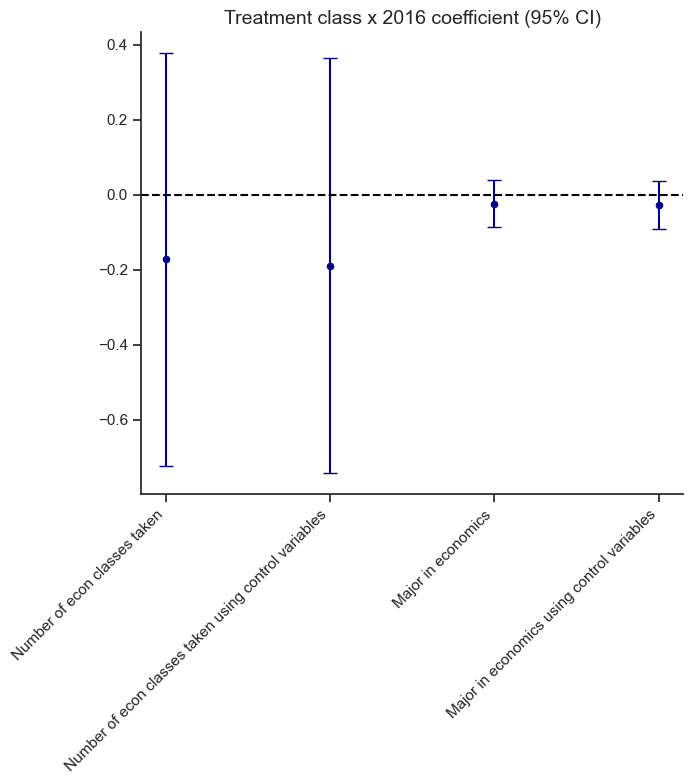

In [89]:
fig, ax = plt.subplots(figsize=(7, 6))

# scatter plot ( para los points . coeficciente)

ax.scatter(x=table_pandas['Model'], 
         marker='o', s=20,  # s: modificar tamaño del point
         y=table_pandas['Estimate'], color = "darkblue")

# errorbar para graficar el itervalo de confianza 

eb1 = plt.errorbar(x=table_pandas['Model'], y=table_pandas['Estimate'],
            yerr = 0.5*(table_pandas['Upper_bound']- table_pandas['Lower_bound']),
            color = 'darkblue', ls='', capsize = 5)

# yerr: distancia del punto (coeficeinte) a los extremo del intervalo (la mitad de la diferencia del upper vs lower bound)
# capsize: longitud de las barras del intervalo

# ls='': no une los puntos rojos 
#  yerr genera el gráfico del intervalo de confianza 

plt.axhline(y=0, color = 'black').set_linestyle('--')  # linea horizontal 

# Set title & labels
plt.title('Treatment class x 2016 coefficient (95% CI)',fontsize=14)


# Rotar los nombres de las categorías en el eje x
plt.xticks(rotation=45, ha='right')

plt.savefig('coefplot.png', dpi=300, bbox_inches='tight')

plt.show()



<Figure size 640x480 with 0 Axes>

### Pregunta 2
##### 1.2 Coordenadas de instituciones educativas (Web Scrapping dinámico)


In [99]:
# check selenium version 
!pip install selenium==4.2.0
!pip install webdriver-manager
!pip install html5lib


import selenium
print(selenium.__version__)


     -------------------------------------- 112.2/112.2 kB 1.3 MB/s eta 0:00:00
4.2.0


In [100]:
from selenium import webdriver  # manipulación de driver 
from webdriver_manager.chrome import ChromeDriverManager # manejar diferentes versiones del driver


import re # expresiones regulares 
import time # time 
from selenium.webdriver.support.ui import Select  # Trabaja con el tag <select></select>
import os
import sys
from selenium.webdriver.common.by import By  # permite seleccionar los elementos en un html
import warnings
warnings.filterwarnings('ignore') # eliminar warning messages 

from selenium.webdriver.common.keys import Keys  # ingresar información a la página web (nombres, fechas)
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver import ActionChains # movilizarnos en la página web 
import pandas as pd
import numpy as np 
import unidecode  # usaremos para reconocer las tildes 
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore') # eliminar warning messages 

from webdriver_manager.chrome import ChromeDriverManager

# Utilizar ChromeDriverManager en tu código
driver_path = ChromeDriverManager().install()


[WDM] - Downloading: 100%|██████████| 6.30M/6.30M [00:01<00:00, 5.85MB/s]


In [103]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

# Crear una instancia del controlador de Chrome
driver = webdriver.Chrome(ChromeDriverManager().install())

# Maximizar la ventana del navegador
driver.maximize_window()

# Abrir la URL
url = 'https://venezuela360.org/arcgis/apps/sites/#/infraestructura-geoespacial/datasets/3d0308d198ba422fbdabd2e1859eb577/data'
driver.get(url)

In [104]:
import time

# Esperar 5 segundos para permitir que la página se cargue completamente
time.sleep(5)# Acceso al contenido del tag <title></title>
print('Title: ', driver.title)

#Nos salió como respuesta: Title:  Elecciones 2000-2015 | Infraestructura Geoespacial

Title:  Elecciones 2000-2015 | Infraestructura Geoespacial


In [105]:
# Access al url

print('Current Page URL: ', driver.current_url)

Current Page URL:  https://venezuela360.org/arcgis/apps/sites/#/infraestructura-geoespacial/datasets/3d0308d198ba422fbdabd2e1859eb577/data


In [106]:
type(driver)

selenium.webdriver.chrome.webdriver.WebDriver

In [107]:
dir(driver) #observamos los métodos y atributos del objeto 


['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_authenticator_id',
 '_file_detector',
 '_get_cdp_details',
 '_is_remote',
 '_mobile',
 '_shadowroot_cls',
 '_switch_to',
 '_unwrap_value',
 '_web_element_cls',
 '_wrap_value',
 'add_cookie',
 'add_credential',
 'add_virtual_authenticator',
 'application_cache',
 'back',
 'bidi_connection',
 'capabilities',
 'caps',
 'close',
 'command_executor',
 'create_options',
 'create_web_element',
 'current_url',
 'current_window_handle',
 'delete_all_cookies',
 'delete_cookie',
 'delete_network_conditions',
 'desired_capabilities',
 'error_handler',
 'execute',
 'ex

In [108]:
!pip install beautifulsoup4

!pip install pandas

!pip install requests

from bs4 import BeautifulSoup
import pandas as pd
import requests


In [109]:
from selenium import webdriver

# Configura el controlador Selenium (por ejemplo, utilizando Chrome)
driver = webdriver.Chrome()
driver.get('https://venezuela360.org/arcgis/apps/sites/#/infraestructura-geoespacial/datasets/3d0308d198ba422fbdabd2e1859eb577/data?page=4=1')

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


##### 2.2 Coordenadas de instituciones educativas (Web Scrapping dinámico)


In [90]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options


In [110]:
import time

from selenium import webdriver


driver = webdriver.Chrome('/path/to/chromedriver')  # Optional argument, if not specified will search path.

driver.get('http://www.google.com/');

time.sleep(5) # Let the user actually see something!

search_box = driver.find_element_by_name('q')

search_box.send_keys('ChromeDriver')

search_box.submit()

time.sleep(5) # Let the user actually see something!

driver.quit()

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


In [92]:
# Configuración de Selenium
chrome_options = Options()
chrome_options.add_argument("--headless")  # Ejecutar Chrome en modo silencioso
service = Service('path/to/chromedriver')  # Ruta al archivo chromedriver

# Inicializar el controlador de Selenium
driver = webdriver.Chrome(service=service, options=chrome_options)

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


In [93]:
# Ruta del archivo MODELO.dta
data1 = pd.read_stata(r'../../data/trabajo_final/CE/resultado_2014.dta')
data1

C:\Users\ALICIA\AppData\Local\Temp\ipykernel_15096\533227091.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  data1 = pd.read_stata(r'../../data/trabajo_final/CE/resultado_2014.dta')


,COD_MOD,ANEXO,TIPOREG,NROCED,CUADRO,TIPDATO,DESCRIP,D01,D02,D03,...,D19,D20,FORMAS,NIV_MOD,TIPOPROG,GES_DEP,CODOOII,CODGEO,AREA_MED,IMPUTADO
0,0001506,0,9,02,101,01,Concluyeron,0,0,0,...,0,0,N,A5,4,A1,150206,151011,2,0
1,0001506,0,9,02,101,03,Trasladados a otro P.E./I.E.,0,0,0,...,0,0,N,A5,4,A1,150206,151011,2,0
2,0001507,0,9,02,101,01,Concluyeron,0,0,0,...,0,0,N,A5,4,A1,150206,151003,2,0
3,0001509,0,9,02,101,01,Concluyeron,0,0,0,...,0,0,N,A5,4,A1,150206,151001,2,0
4,0001512,0,9,02,101,01,Concluyeron,0,0,0,...,0,0,N,A5,4,A1,150206,151003,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308871,1501212,0,1,08,101,02,Retirados,0,0,0,...,0,0,N,E0,a,A1,150106,150132,1,1
308872,1501212,0,1,08,104,01,Situación económica,0,0,0,...,0,0,N,E0,a,A1,150106,150132,1,1
308873,0901835,0,1,08,101,01,Concluyeron,2,2,5,...,0,0,N,E0,a,A1,150106,150132,1,1
308874,0901835,0,1,08,101,02,Retirados,0,0,0,...,0,0,N,E0,a,A1,150106,150132,1,1


In [94]:
data1['lat'] = None
data1['long'] = None

In [95]:
data1

,COD_MOD,ANEXO,TIPOREG,NROCED,CUADRO,TIPDATO,DESCRIP,D01,D02,D03,...,FORMAS,NIV_MOD,TIPOPROG,GES_DEP,CODOOII,CODGEO,AREA_MED,IMPUTADO,lat,long
0,0001506,0,9,02,101,01,Concluyeron,0,0,0,...,N,A5,4,A1,150206,151011,2,0,None,None
1,0001506,0,9,02,101,03,Trasladados a otro P.E./I.E.,0,0,0,...,N,A5,4,A1,150206,151011,2,0,None,None
2,0001507,0,9,02,101,01,Concluyeron,0,0,0,...,N,A5,4,A1,150206,151003,2,0,None,None
3,0001509,0,9,02,101,01,Concluyeron,0,0,0,...,N,A5,4,A1,150206,151001,2,0,None,None
4,0001512,0,9,02,101,01,Concluyeron,0,0,0,...,N,A5,4,A1,150206,151003,2,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308871,1501212,0,1,08,101,02,Retirados,0,0,0,...,N,E0,a,A1,150106,150132,1,1,None,None
308872,1501212,0,1,08,104,01,Situación económica,0,0,0,...,N,E0,a,A1,150106,150132,1,1,None,None
308873,0901835,0,1,08,101,01,Concluyeron,2,2,5,...,N,E0,a,A1,150106,150132,1,1,None,None
308874,0901835,0,1,08,101,02,Retirados,0,0,0,...,N,E0,a,A1,150106,150132,1,1,None,None


In [96]:
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd

!pip install geopandas

import geopandas as gpd
from textwrap import wrap

In [97]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [98]:
import chardet

with open('../../data/trabajo_final/CE/resultado_2014.dta', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])

#Obtuvimos "Windows-1254" = "Latin-5"
#El archivo fue probablemente codificado utilizando este conjunto de caracteres específico para admitir el idioma turco.

Windows-1254
